### Primera prueba de POD
<p align="justify"> Primero cargamos las librerías que se van a usar</p>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.linalg import svd
import matplotlib.patches as mpatches


<p align="justify"> Importamos los datos de la simulación de flujo alrededor de un cilindro tomado de <strong> Dynamic Mode Decomposition: data-driven modelling for complex systems </strong> </p>

In [29]:
#VORTALL = np.loadtxt('VORTALL.txt', dtype='float', delimiter =',')
#VORTALL = h5py.File('CYLINDER_ALL.mat','r')
CYLINDER = scipy.io.loadmat('CYLINDER_ALL.mat', struct_as_record=True)
VORTALL = CYLINDER['VORTALL']

In [53]:
def plotField(Field):
    vortmin = -5
    vortmax = 5
    
    Field[Field<vortmin] = vortmin
    Field[Field>vortmax] = vortmax
    
    plt.figure(facecolor="white",  edgecolor='k')
    cm = plt.imshow(Field, cmap='viridis', interpolation='none', vmin=vortmin, vmax=vortmax)
    wedge = mpatches.Wedge((0,99), 33, 270, 90, ec="#636363", color='#636363',lw = 5, zorder=200)
    cm.axes.add_patch(p=wedge)  
    plt.colorbar(cm)
    plt.show
    
    

In [77]:
def plot_flow_cyliner(Xsmall):
    import cmocean

    x2 = np.arange(0, 449, 1)
    y2 = np.arange(0, 199, 1)
    mX, mY = np.meshgrid(x2, y2)

    img = Xsmall.reshape(449,199)

    #minmax = np.max(np.abs(img)) * 0.65
    minmax = 5
    plt.figure(facecolor="white",  edgecolor='k', figsize=(7.9,4.7))
    #plt.contourf(mX, mY, img.T, 80, cmap=cmocean.cm.balance, alpha=1, vmin=-minmax, vmax=minmax)
    #plt.contour(mX, mY, img.T, 80, colors='black', alpha=0.5, vmin=-minmax, vmax=minmax)
    im = plt.imshow(img.T, cmap=cmocean.cm.balance, interpolation='none', vmin=-minmax, vmax=minmax)

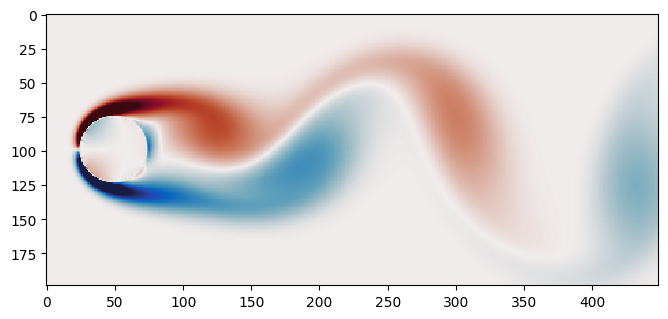

In [78]:
#Se toman snapshot cada 10*delta(t), y el delta(t) = 0.02 para satsifacer CFL
delta_t = 0.02
t_analisis = 10
t_index = int(t_analisis/(10*delta_t))

#Dominio espacial
ny = 449
nx = 199

Vortex15 = VORTALL[:,t_index]
plot_flow_cyliner(Vortex15)
Vortex15 = Vortex15.reshape((nx, ny))

#fig1 = plotField(Vortex15)


In [37]:
print(len(Vortex15[0]))

449
